<a href="https://colab.research.google.com/github/jpedrocf/MachineLearningStudies/blob/main/ModelTestingCLRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

# Imports and Dataset Load

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [67]:
calidata = fetch_california_housing()
X, y = calidata.data, calidata.target

calidata = pd.DataFrame(X, columns=calidata.feature_names)
calidata['MedHouseVal'] = y

calidata.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Splitting the data into training and testing sets (80% training, 20% testing)

In [68]:
array = calidata.values
X = array[:,0:8]
y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

nfold = 10
kfold = KFold(n_splits=nfold, shuffle=True, random_state=7)

# Data Modeling

In [71]:
np.random.seed(7)

models = []
results = []
names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


LR: MSE 0.58 (0.15) - RMSE 0.76
Ridge: MSE 0.58 (0.15) - RMSE 0.76
Lasso: MSE 0.95 (0.03) - RMSE 0.97
KNN: MSE 1.14 (0.03) - RMSE 1.07
CART: MSE 0.53 (0.03) - RMSE 0.73
SVM: MSE 1.37 (0.06) - RMSE 1.17


# Boxplot

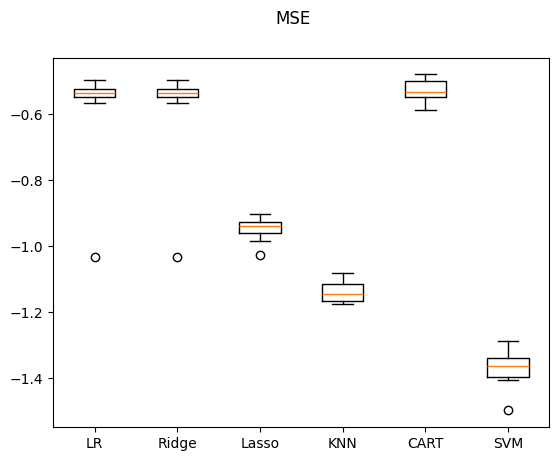

In [72]:
fig = plt.figure()
fig.suptitle('MSE')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Creating a Model

In [73]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("MSE %0.2f" % mean_squared_error(y_test, predictions))
print("RMSE %0.2f" % np.sqrt(mean_squared_error(y_test, predictions)))

MSE 0.52
RMSE 0.72
